In [7]:
# taken from https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{text}</p>".format(font=fontname, text="α = 1 - exp(-exp(σ) · d)")

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist])) if not font.startswith('Noto')])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 12})

In [9]:
def compute_alpha(func, x, d):
    a = 1. - torch.exp(-func(x) * d)
    return a

raw_features = torch.linspace(-20, 20, 10001)
pretty_d = {
    1e3: "1e3",
    1e2: "1e2",
    1e1: "1e1",
    1e0: "1e0",
    1e-1: "1e-1",
    1e-2: "1e-2",
    1e-3: "1e-3",
}

The following code block applies the $\mathtt{exp}$ activation function onto the raw feature vectors.

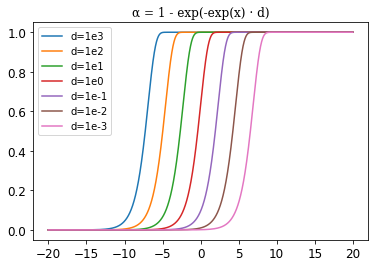

In [10]:
fig, ax = plt.subplots()
for distance_scale in [1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3]:
    sigmas = compute_alpha(torch.exp, raw_features, distance_scale)
    ax.plot(raw_features, sigmas, label=f"d={pretty_d[distance_scale]}")

ax.set_title(f"α = 1 - exp(-exp(x) · d)", fontsize=12, fontdict={'fontfamily': 'serif'})
ax.legend(fontsize=10)
plt.savefig('exp.pdf', bbox_inches='tight', dpi=300)
plt.show()

The following code block applies the $\mathtt{softplus}$ activation function onto the raw feature vectors.

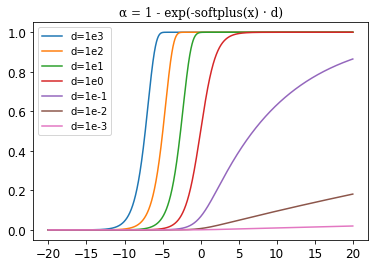

In [11]:
fig, ax = plt.subplots()
for distance_scale in [1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3]:
    sigmas = compute_alpha(F.softplus, raw_features, distance_scale)
    ax.plot(raw_features, sigmas, label=f"d={pretty_d[distance_scale]}")

ax.set_title(f"α = 1 - exp(-softplus(x) · d)", fontsize=12, fontdict={'fontfamily': 'serif'})
ax.legend(fontsize=10)
plt.savefig('softplus.pdf', bbox_inches='tight', dpi=300)
plt.show()

The following code block applies the $\mathtt{relu}$ activation function onto the raw feature vectors.

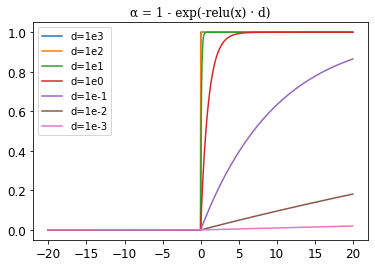

In [12]:
fig, ax = plt.subplots()
for distance_scale in [1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3]:
    sigmas = compute_alpha(torch.relu, raw_features, distance_scale)
    ax.plot(raw_features, sigmas, label=f"d={pretty_d[distance_scale]}")

ax.set_title(f"α = 1 - exp(-relu(x) · d)", fontsize=12, fontdict={'fontfamily': 'serif'})
ax.legend(fontsize=10)
plt.savefig('relu.pdf', bbox_inches='tight', dpi=300)
plt.show()